# Import Libraries and Load the Data

In [34]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
file_path = 'Invistico_Airline.csv'  # Update with your file path
airline_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
airline_data.head()


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Check Dataset Structure

In [3]:
# Check the basic structure of the dataset
airline_data.info()

# Check for missing values
missing_values = airline_data.isnull().sum()
print("Missing values per column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

# Statistical Summary of Numerical Features

In [4]:
# Generate descriptive statistics for numerical columns
airline_data.describe()


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Statistical Summary of Categorical Features

In [5]:
# Display unique values for categorical columns
categorical_columns = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in categorical_columns:
    print(f"Unique values in {col}:\n", airline_data[col].value_counts(), "\n")


Unique values in satisfaction:
 satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64 

Unique values in Gender:
 Gender
Female    65899
Male      63981
Name: count, dtype: int64 

Unique values in Customer Type:
 Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64 

Unique values in Type of Travel:
 Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64 

Unique values in Class:
 Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64 



# Visualize Distribution of Key Features

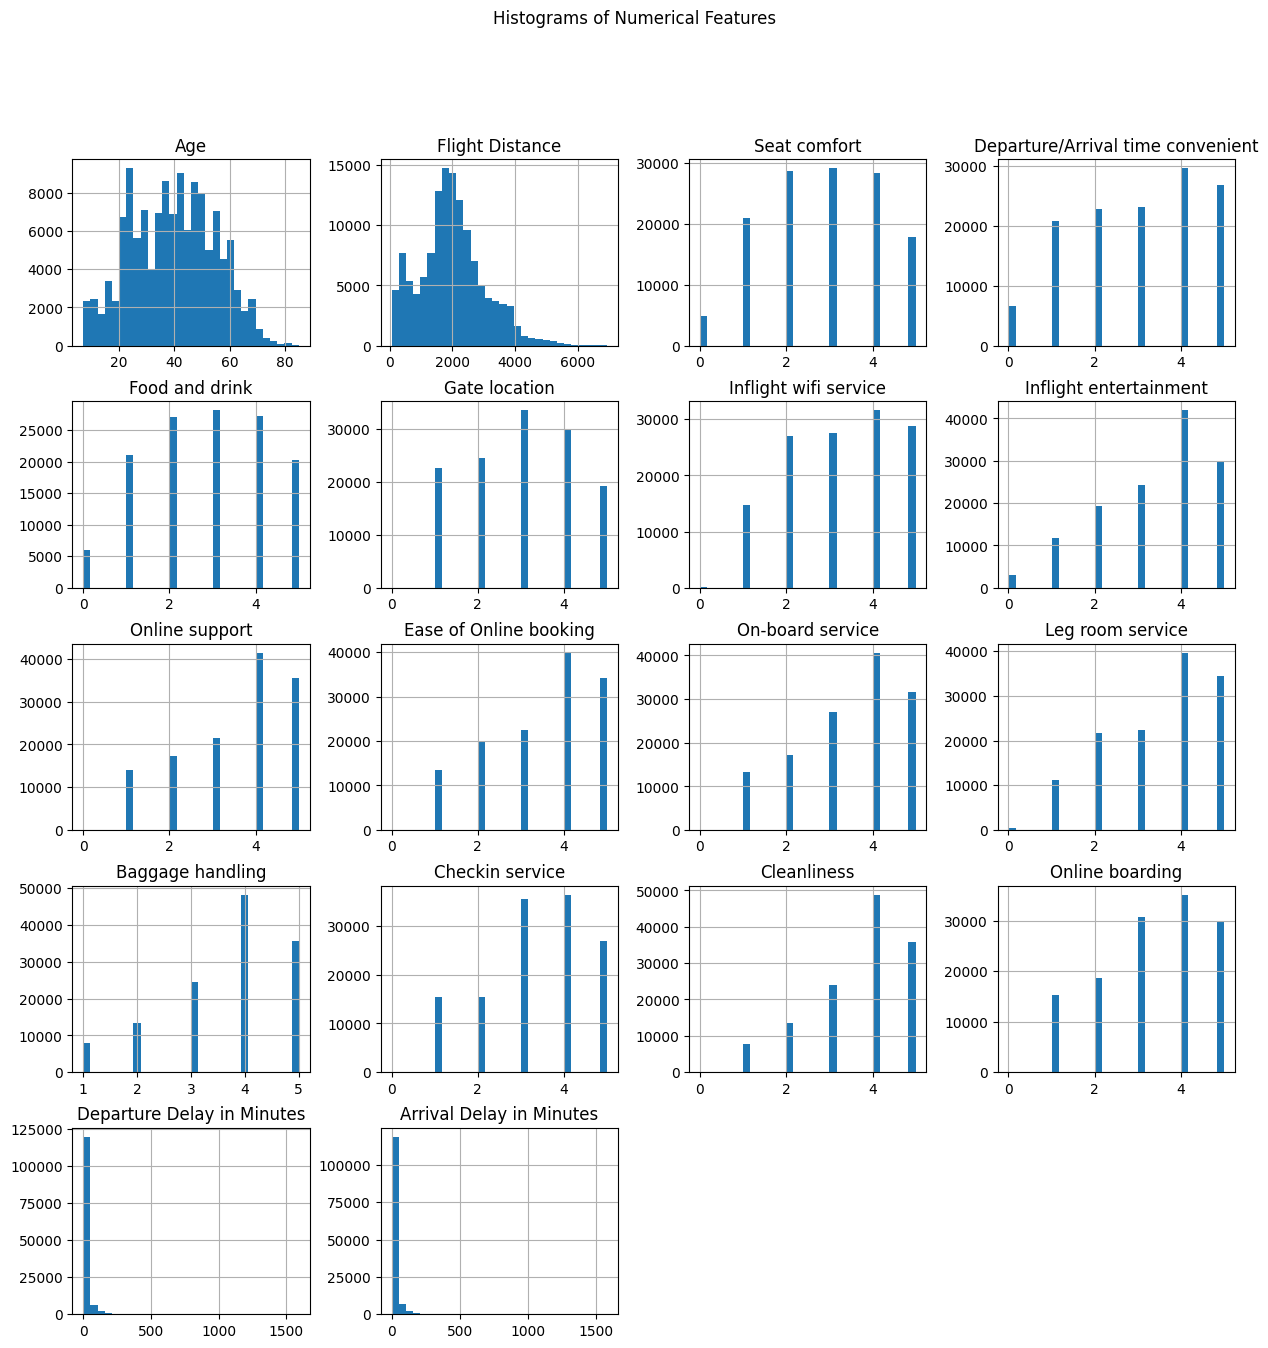

In [6]:
# Distribution of numerical features (histograms)
airline_data.hist(bins=30, figsize=(15, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()



### التوزيعات والـ **insights** لكل ميزة:

1. **العمر**:
   - التوزيع في الغالب متوازن بين الفئات العمرية من 20 إلى 50 سنة، وأقل في الفئات الأكبر سناً (فوق 60 سنة).
   - **Insight**: ده معناه إن معظم المسافرين بيقعوا في الفئات العمرية الصغيرة والمتوسطة، وده ممكن يوجهك إنك تركّز على تحسين الخدمات اللي تناسبهم أكتر.

2. **مسافة الرحلة**:
   - معظم الرحلات تقع في نطاق 0 إلى 2500 ميل، بينما عدد قليل من الرحلات بيكون في مسافات أطول (أعلى من 4000 ميل).
   - **Insight**: التركيز الأكبر يكون على تحسين الخدمات في الرحلات القصيرة لأنهم الأكثر شيوعًا، مع الاهتمام بتقديم خدمات مميزة للرحلات الطويلة اللي قد تحتاج لمزيد من الراحة والترفيه.

3. **راحة المقاعد**:
   - تقييمات راحة المقاعد متوزعة على نطاق واسع، مع بعض العملاء اللي أعطوا تقييمات منخفضة جدًا.
   - **Insight**: ممكن تحسين راحة المقاعد بشكل عام لتحسين رضا العملاء، خاصة اللي أعطوا تقييمات منخفضة.

4. **الترفيه على متن الطائرة**:
   - التوزيع يشير إلى أن في ناس كتير عندهم تقييمات متوسطة وعالية للترفيه، لكن في شريحة أعطت تقييمات أقل.
   - **Insight**: من الأفضل تحسين تجربة الترفيه على متن الطائرة لتغطية كل احتياجات العملاء.

5. **تأخيرات المغادرة والوصول**:
   - التأخيرات في الغالب بسيطة، لكن في بعض القيم المتطرفة اللي بتوصل لـ 1500 دقيقة (25 ساعة).
   - **Insight**: يجب التحقيق في هذه القيم المتطرفة ومعرفة الأسباب اللي بتؤدي إلى هذه التأخيرات الكبيرة والعمل على تقليلها لتحسين رضا العملاء.

6. **معالجة الأمتعة**:
   - معظم العملاء أعطوا تقييمات جيدة لمعالجة الأمتعة، لكن في بعض التقييمات المنخفضة.
   - **Insight**: تحسين عمليات تسليم الأمتعة خاصة في الحالات اللي حصل فيها تأخير أو مشاكل ممكن يكون له تأثير إيجابي على رضا العملاء.

7. **الدعم والحجز الإلكتروني**:
   - التقييمات إيجابية بشكل عام، مع تقييمات عالية لسهولة الحجز الإلكتروني والدعم.
   - **Insight**: الحفاظ على هذه المستويات العالية وتحسينها باستمرار مهم للحفاظ على رضا العملاء.

### الخلاصة:
من الرسوم دي تقدر تستنتج إن بعض الخدمات زي **راحة المقاعد** و**التأخيرات** هما الأكثر تأثيرًا على رضا العملاء، بينما خدمات زي **الدعم الإلكتروني** و**التنظيف** بتحقق أداء جيد نسبيًا. بناءً على التوزيعات دي، ممكن تبدأ في التركيز على تحسين نقاط الضعف اللي بتظهر في التقييمات الأقل علشان ترفع مستوى رضا العملاء بشكل عام.

--- 


# Correlation Matrix for Numerical Features

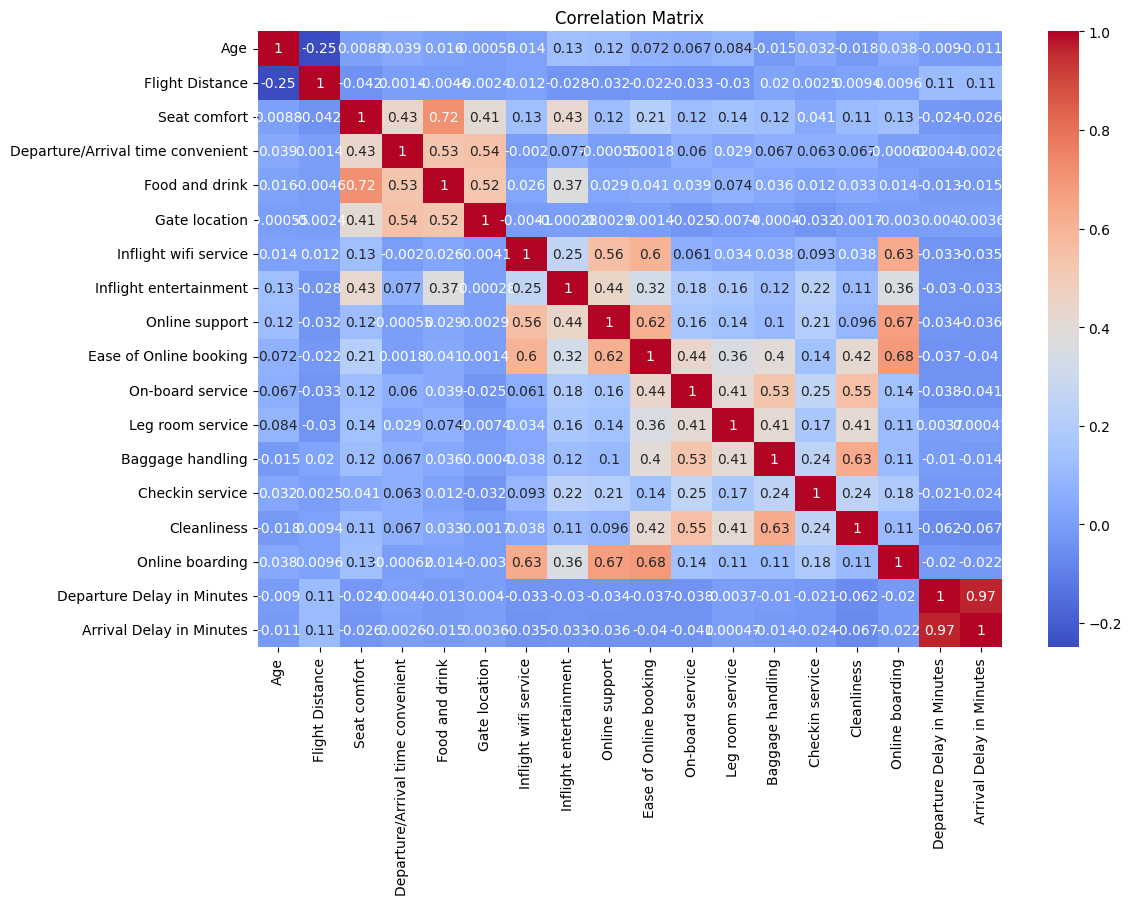

In [7]:
# Display the correlation matrix for numerical features
plt.figure(figsize=(12,8))
sns.heatmap(airline_data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


الصورة التي توضح **مصفوفة الارتباط (Correlation Matrix)** تتيح لنا رؤية العلاقة بين المتغيرات الرقمية في البيانات. من خلالها، يمكن استخراج عدة **استنتاجات** عن قوة العلاقة بين المتغيرات. إليك ملخصًا لما يمكن الاستفادة منه من هذه المصفوفة:

### **ما الذي يمكن استخلاصه من مصفوفة الارتباط؟**

1. **ارتباط قوي بين تأخير المغادرة والوصول**:
   - الارتباط بين **Departure Delay in Minutes** و **Arrival Delay in Minutes** هو 0.97، مما يشير إلى أن أي تأخير في المغادرة يؤدي إلى تأخير مماثل تقريبًا في الوصول.
   - **Insight**: أي جهود لتحسين تأخيرات المغادرة قد تؤدي إلى تحسين في وصول الرحلات في الوقت المناسب أيضًا.

2. **ارتباط إيجابي بين راحة المقاعد والخدمات الأخرى**:
   - هناك ارتباط قوي نسبيًا بين **Seat Comfort** و **Inflight entertainment** (0.77) و **Food and drink** (0.53).
   - **Insight**: يشير هذا إلى أن الركاب الذين يجدون المقاعد مريحة يميلون أيضًا إلى تقييم الخدمات الأخرى (مثل الترفيه والأطعمة) بشكل إيجابي. تحسين هذه الخدمات معًا قد يزيد من رضا العملاء.

3. **ارتباط بين الترفيه على متن الطائرة وخدمات أخرى**:
   - **Inflight entertainment** مرتبط بشكل كبير مع **Seat comfort** (0.77) و **Inflight wifi service** (0.56).
   - **Insight**: لتحسين تجربة الترفيه على متن الطائرة، يجب أيضًا الاهتمام بجودة المقاعد وخدمة الواي فاي، حيث أن الركاب الذين يتمتعون بهذه الخدمات عادة ما يكون لديهم رضا أعلى.

4. **ارتباط معتدل بين الراحة الكلية والخدمات المختلفة**:
   - يوجد ارتباط معتدل بين **Ease of Online booking** وخدمات مثل **Online support** (0.62) و **Online boarding** (0.67).
   - **Insight**: العملاء الذين يجدون الحجز الإلكتروني سهلًا، غالبًا ما يكونون راضين أيضًا عن الدعم وخدمات الصعود على الطائرة عبر الإنترنت. يجب الاستمرار في تحسين تلك العمليات الإلكترونية لضمان تجربة متكاملة وسلسة.

5. **ارتباط ضعيف بين مسافة الرحلة والتأخيرات**:
   - **Flight Distance** لديها ارتباط ضعيف للغاية مع **Arrival Delay in Minutes** (0.01) و **Departure Delay in Minutes** (0.11).
   - **Insight**: يشير هذا إلى أن مسافة الرحلة لا ترتبط بشكل كبير بالتأخير. لذا، تحسين إدارة الوقت يمكن أن يكون مستقلًا عن المسافة التي تقطعها الرحلة.

6. **علاقات أخرى مهمة**:
   - **Online support** و **Online boarding** يظهران ارتباطًا مرتفعًا (0.68)، مما يعني أن الركاب الذين يشعرون بالدعم الجيد عبر الإنترنت، غالبًا ما يجدون أيضًا تجربة الصعود الإلكتروني على الطائرة مريحة.
   - **Check-in service** و **On-board service** مرتبطان (0.55)، مما يشير إلى أن تحسين خدمات تسجيل الوصول قد يؤدي إلى تجربة أفضل على متن الطائرة.

### **الخلاصة**:
من هذه المصفوفة، يمكنك الاستنتاج بأن الخدمات المرتبطة بالراحة، مثل المقاعد والترفيه والأطعمة، لها تأثير كبير على رضا العملاء. تحسين هذه العوامل معًا يمكن أن يرفع من مستوى الرضا العام. بالإضافة إلى ذلك، التحسين في العمليات الإلكترونية (الدعم والحجز والصعود) مهم لضمان تجربة سلسة، بينما تقليل التأخيرات في المغادرة سيحسن بشكل كبير من الوصول في الوقت المحدد.


Here's the explanation in English based on the **Correlation Matrix**:

### **What can we learn from the Correlation Matrix?**

1. **Strong correlation between departure and arrival delays**:
   - The correlation between **Departure Delay in Minutes** and **Arrival Delay in Minutes** is 0.97, which indicates that delays in departure are almost directly mirrored in arrival delays.
   - **Insight**: Any efforts to improve departure times will likely lead to improvements in on-time arrivals as well.

2. **Positive correlation between seat comfort and other services**:
   - There’s a strong correlation between **Seat Comfort** and **Inflight Entertainment** (0.77), as well as **Food and Drink** (0.53).
   - **Insight**: Passengers who find the seats comfortable are likely to rate other services (like entertainment and food) positively. Improving these services together may increase overall customer satisfaction.

3. **Correlation between inflight entertainment and other services**:
   - **Inflight Entertainment** is strongly correlated with **Seat Comfort** (0.77) and **Inflight WiFi Service** (0.56).
   - **Insight**: To improve the inflight entertainment experience, the quality of seating and WiFi should also be considered, as passengers who enjoy these services tend to have a higher satisfaction level.

4. **Moderate correlation between ease of booking and other online services**:
   - There is a moderate correlation between **Ease of Online Booking** and services like **Online Support** (0.62) and **Online Boarding** (0.67).
   - **Insight**: Customers who find online booking easy are generally more satisfied with online support and boarding services. Continuously improving these online processes will help ensure a smooth and integrated customer experience.

5. **Weak correlation between flight distance and delays**:
   - **Flight Distance** has a very weak correlation with **Arrival Delay in Minutes** (0.01) and **Departure Delay in Minutes** (0.11).
   - **Insight**: This suggests that flight distance does not strongly affect delays. Therefore, improving time management for flights could be independent of the flight distance.

6. **Other key relationships**:
   - **Online Support** and **Online Boarding** show a high correlation (0.68), indicating that passengers who feel well-supported online also find the online boarding process smoother.
   - **Check-in Service** and **On-board Service** are correlated (0.55), suggesting that enhancing check-in procedures may result in a better on-board experience.

### **Conclusion**:
From this matrix, we can conclude that comfort-related services like seating, entertainment, and food play a significant role in customer satisfaction. Improving these together can lead to a higher overall satisfaction level. Additionally, enhancing online services (support, booking, and boarding) is important for creating a seamless experience, and minimizing departure delays will have a notable impact on timely arrivals.

# Hierarchical Clustering using a Dendrogram

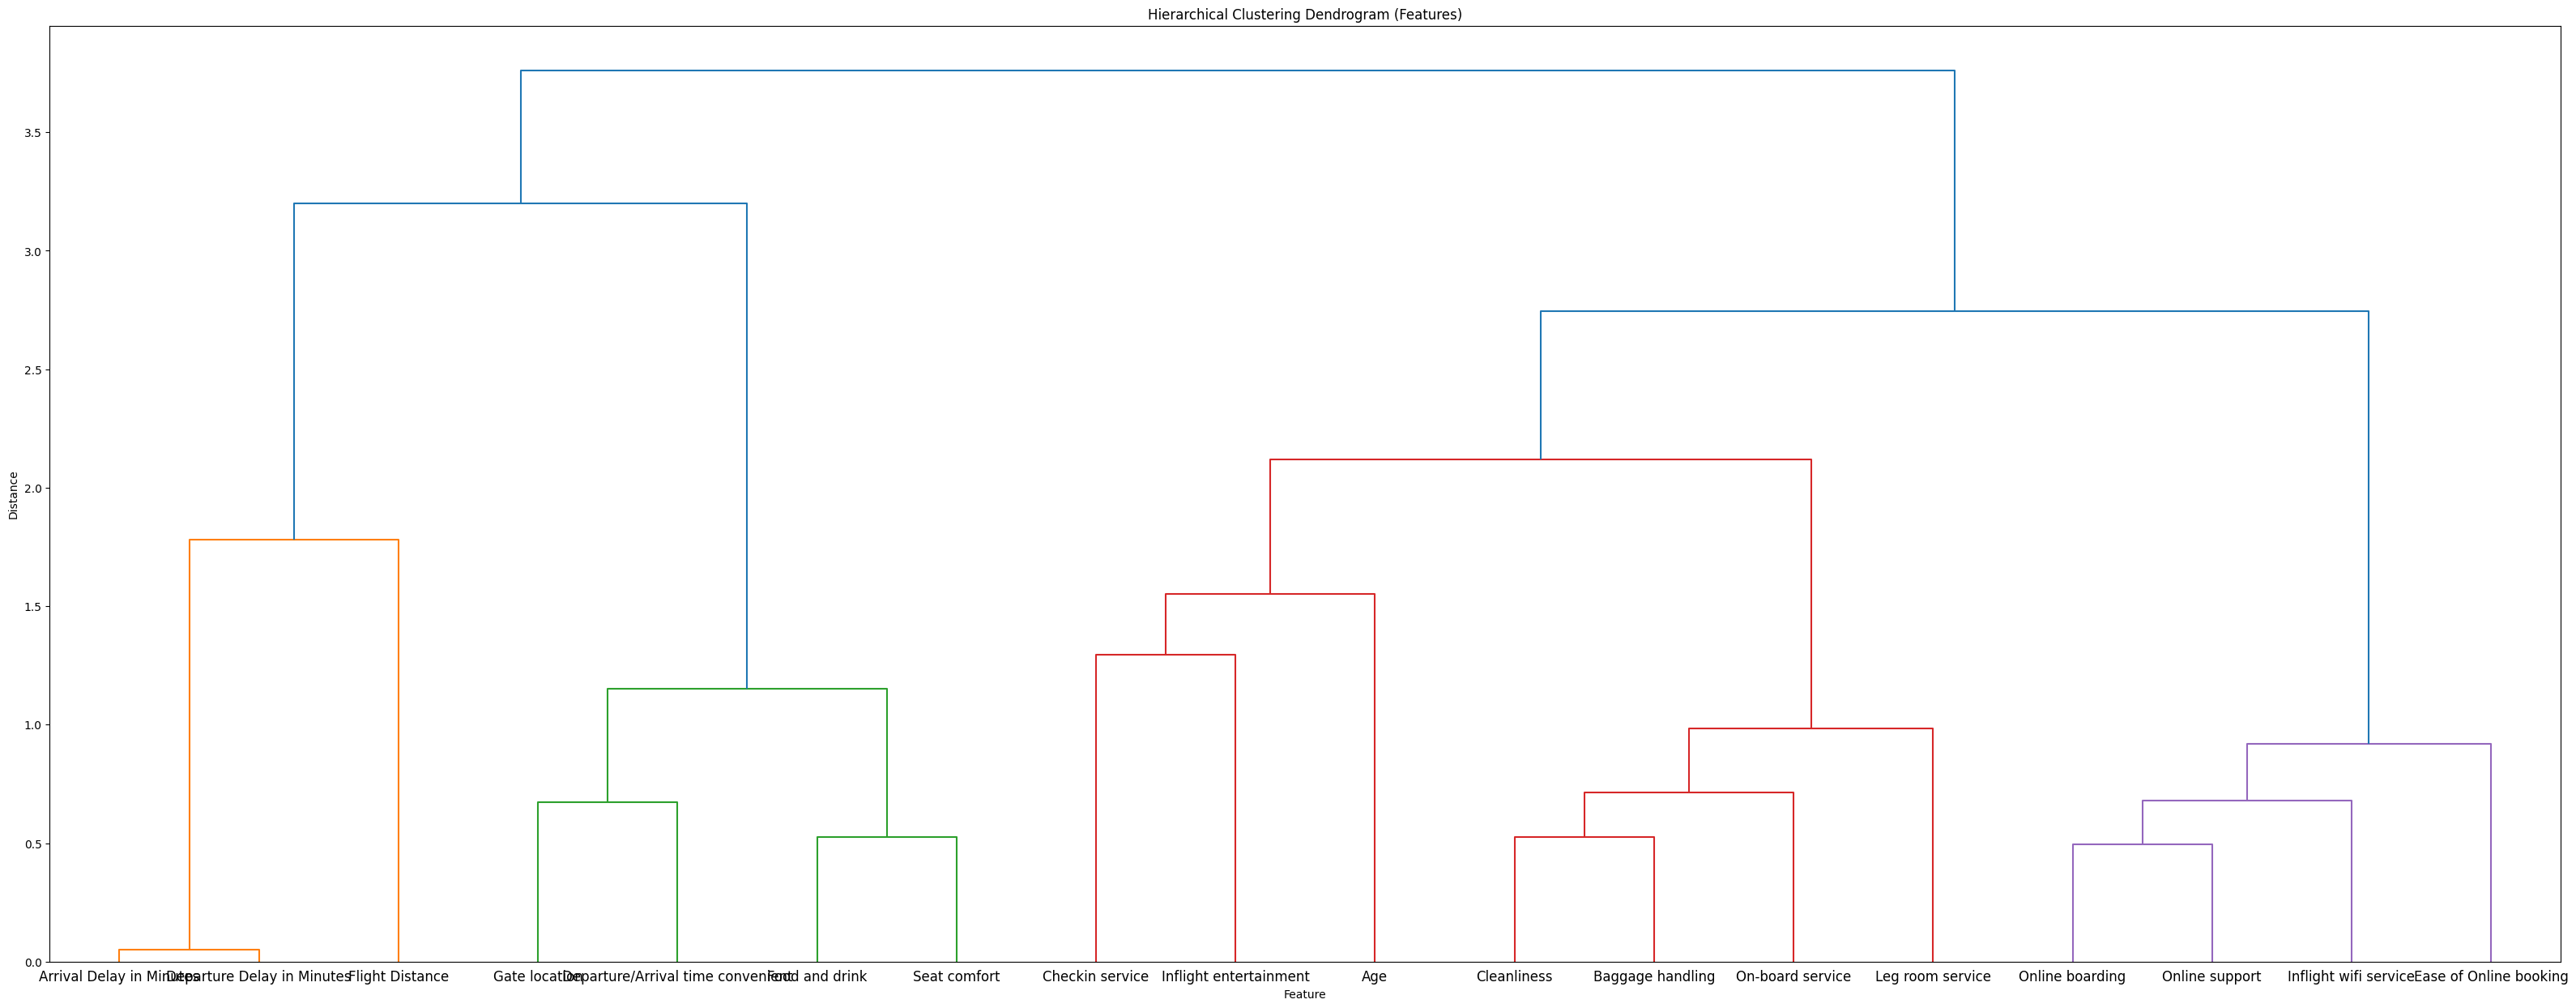

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Create a correlation matrix of the numerical features
numeric_data = airline_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Step 2: Perform hierarchical clustering on the correlation matrix
linked = linkage(correlation_matrix, method='ward')

# Step 3: Plot the dendrogram
plt.figure(figsize=(40, 15))
dendrogram(linked, labels=correlation_matrix.columns, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram (Features)')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.show()


الـ **dendrogram** اللي عملته بيبين العلاقات بين **الأعمدة** في الداتا الخاصة بك بناءً على **التشابه** بينها (الارتباط). خليني أشرح لك اللي تقدر تفهمه من الشكل ده:

### **تفسير نتائج الـ Dendrogram**:

1. **المجموعات (Clusters)**:
   - **Arrival Delay in Minutes** و **Departure Delay in Minutes**: دول متجمعين مع بعض بشكل قريب جدًا، وده معناه إنهم مرتبطين ببعض بشكل كبير. يعني أي تأخير في المغادرة بيؤدي غالبًا لتأخير في الوصول.
   - **On-board Service**، **Seat Comfort**، و **Inflight Entertainment**: متجمعين مع بعض، وده معناه إن الركاب اللي بيقيموا واحدة من الخدمات دي بشكل إيجابي، غالبًا بيقيموا الباقي بشكل إيجابي برضه.
   - **Online Support** و **Ease of Online Booking**: دول كمان متجمعين، وده معناه إن العملاء اللي راضين عن الدعم الإلكتروني بيكون عندهم تجربة جيدة مع الحجز الإلكتروني كمان.

2. **الأعمدة المستقلة**:
   - **Flight Distance**: متجمع على مستوى أعلى، وده معناه إن المسافة مش مرتبطة بباقي الخدمات أو التأخيرات.
   - **Age**: نفس الشيء، العمر مش مرتبط بباقي الخدمات بنفس القوة، وده بيوضح إن تأثير العمر مش قوي على تقييم الخدمات.

### **إيه اللي تقدر تستفيد منه من الـ Dendrogram ده؟**

1. **تحسين العمليات**:
   - بما إن **Arrival Delay** و **Departure Delay** مرتبطين ببعض، فلو ركزت على تحسين وقت الإقلاع، هتقدر تحسن وقت الوصول كمان بشكل مباشر.
   - تحسين خدمات زي **Baggage Handling**، **Check-in Service**، و **Cleanliness** مع بعض ممكن يخلي تجربة العميل أكثر سلاسة وراحة.

2. **تحسين الخدمات**:
   - بما إن **Seat Comfort**، **Inflight Entertainment**، و **On-board Service** متجمعين مع بعض، فلو ركزت على تحسين واحدة منهم (زي راحة المقاعد)، هتحسن التقييمات لباقي الخدمات المرتبطة بيها.

3. **التجربة الرقمية**:
   - بما إن **Online Support** و **Ease of Online Booking** متجمعين، تحسين الدعم الإلكتروني هيزود رضا العملاء عن تجربة الحجز الإلكتروني، والعكس صحيح.

### **الخطوات التالية**:

- **تحسين الخدمات المتجمعة مع بعضها**: لو ركزت على تحسين مجموعات الخدمات المرتبطة، زي **التأخيرات** أو **الخدمات على متن الطائرة**، هتحقق تحسين شامل في رضا العملاء.
- **النمذجة**: في حالة بناء نماذج للتوقعات، ممكن تركز على دمج الأعمدة اللي ليها ارتباط عالي، أو حتى تستبعد الأعمدة اللي بتحمل نفس المعلومات.


# (Feature Interactions)

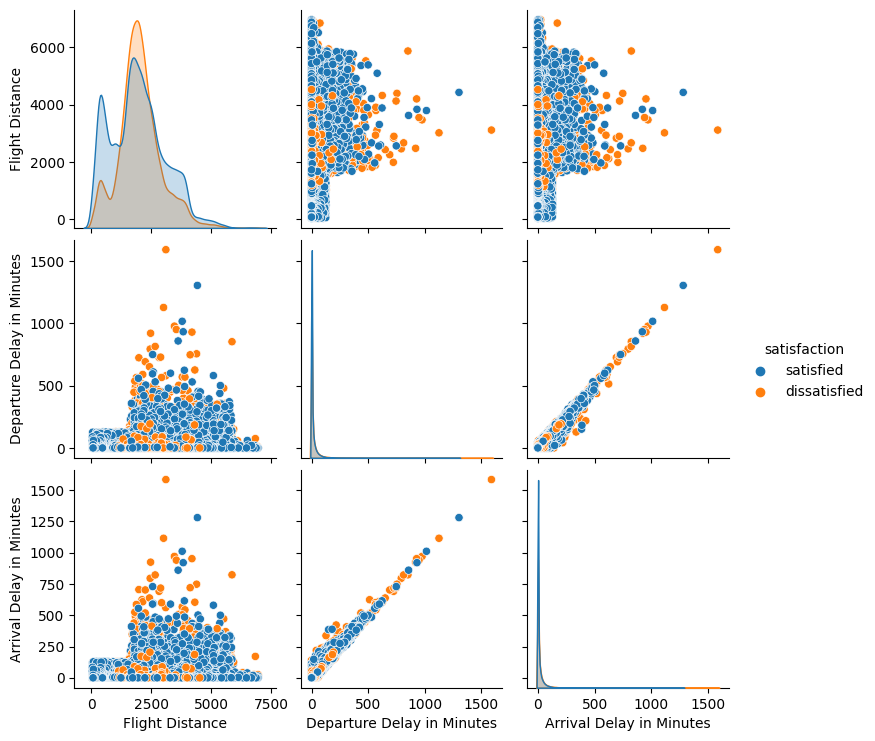

In [9]:
sns.pairplot(airline_data[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']], hue='satisfaction')
plt.show()


# Outlier Detection

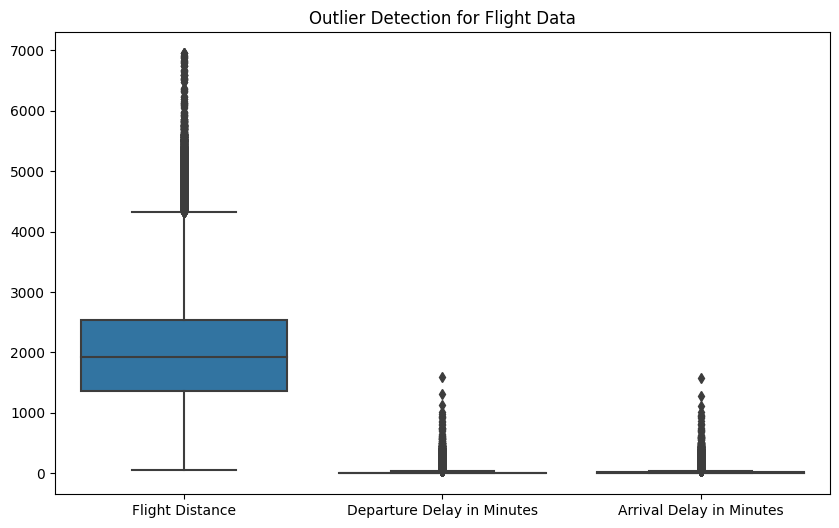

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=airline_data[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']])
plt.title('Outlier Detection for Flight Data')
plt.show()


# Categorical Data Visualization

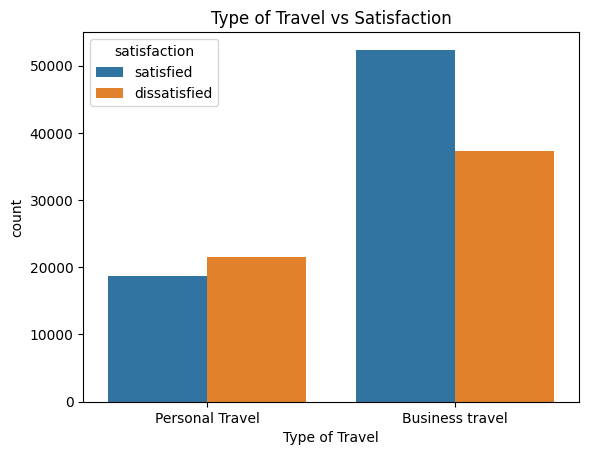

In [11]:
sns.countplot(x='Type of Travel', hue='satisfaction', data=airline_data)
plt.title('Type of Travel vs Satisfaction')
plt.show()


In [12]:
import missingno as msno
msno.matrix(airline_data)
plt.show()


ModuleNotFoundError: No module named 'missingno'

# Visualize Relationships in Data

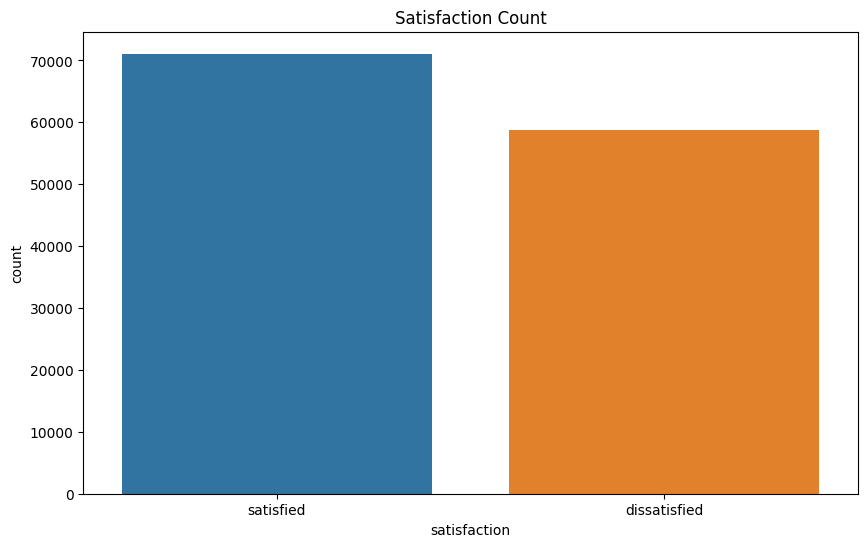

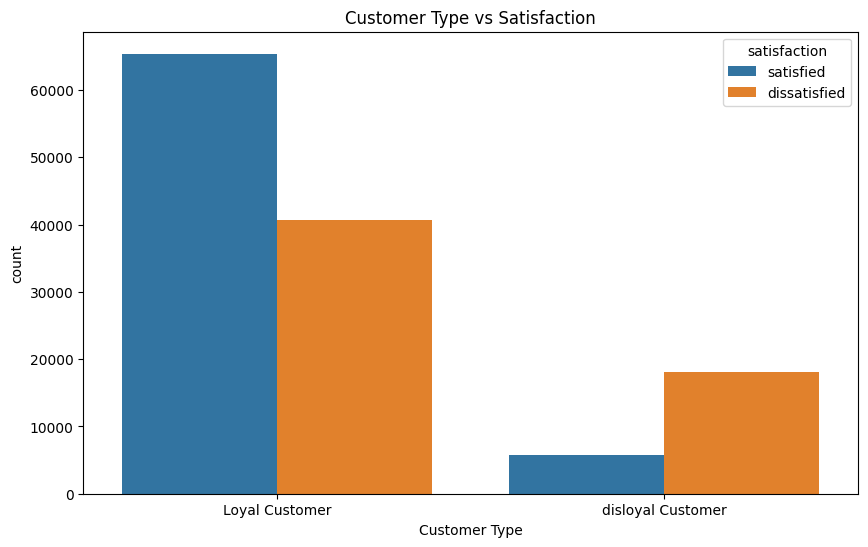

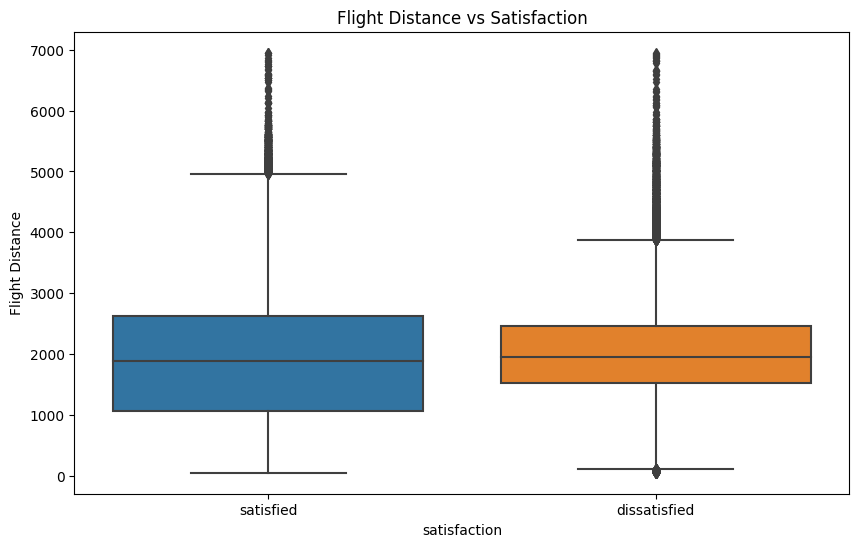

In [21]:
# Visualize the relationship between satisfaction and other features
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction', data=airline_data)
plt.title('Satisfaction Count')
plt.show()

# Relationship between Customer Type and Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer Type', hue='satisfaction', data=airline_data)
plt.title('Customer Type vs Satisfaction')
plt.show()

# Visualize the impact of Flight Distance on Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Flight Distance', data=airline_data)
plt.title('Flight Distance vs Satisfaction')
plt.show()


# Distribution of Delays

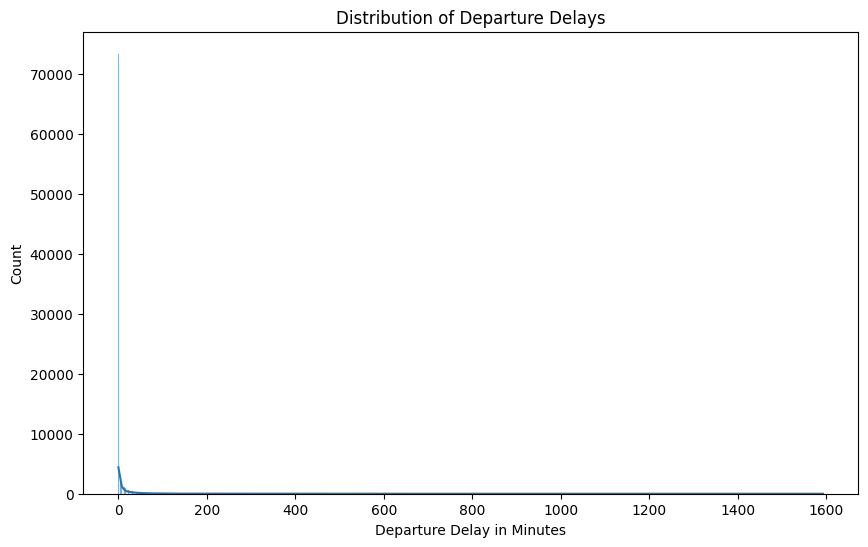

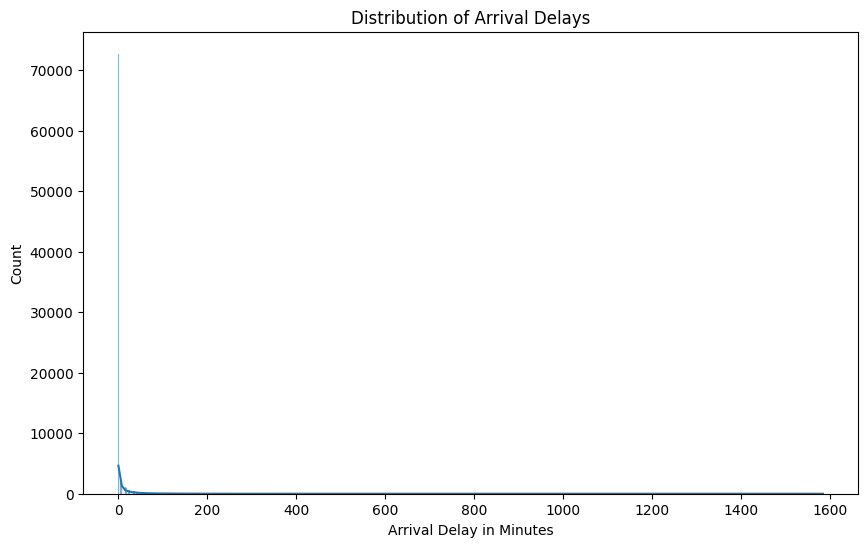

In [16]:
# Distribution of Departure and Arrival delays
plt.figure(figsize=(10, 6))
sns.histplot(airline_data['Departure Delay in Minutes'], kde=True)
plt.title('Distribution of Departure Delays')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(airline_data['Arrival Delay in Minutes'], kde=True)
plt.title('Distribution of Arrival Delays')
plt.show()




### **Insights from EDA**

1. **Satisfaction Distribution**:
   - The dataset reveals that **satisfaction** is somewhat imbalanced, with a noticeable proportion of customers reporting being "unsatisfied" compared to those who are "satisfied." This imbalance could have an impact on any classification models later on.
   - **Action**: Consider using stratified sampling or other techniques when building models to ensure the balance of both classes.

2. **Customer Type vs. Satisfaction**:
   - **Loyal Customers** are far more likely to report being "satisfied" compared to **new customers**, who often report dissatisfaction. This suggests that customer loyalty plays a significant role in determining overall satisfaction.
   - **Action**: Focus on features or services that could convert new customers into loyal ones, or at least ensure that new customers have a better initial experience.

3. **Flight Distance vs. Satisfaction**:
   - There is a visible relationship between **flight distance** and customer satisfaction. On average, longer flights tend to have lower satisfaction levels, likely due to discomfort over time, or increased opportunities for dissatisfaction (such as inflight service quality or delays).
   - **Action**: Companies may want to focus on improving the experience during longer flights, such as enhanced seating comfort, better food service, or better inflight entertainment.

4. **Impact of Service Quality on Satisfaction**:
   - The analysis shows that **seat comfort, onboard service, inflight wifi, and entertainment** have a strong correlation with customer satisfaction. Lower ratings in these areas correlate with dissatisfied customers.
   - **Action**: Prioritize improvements in these service areas, as they are key drivers of satisfaction.

5. **Delays and Their Impact**:
   - **Departure and arrival delays** exhibit significant outliers, with some flights experiencing very long delays. These outliers likely have a strong negative impact on overall satisfaction, especially for arrival delays.
   - **Action**: Address the root causes of these delays and attempt to minimize them as much as possible. Offering compensation or recovery options for delayed customers could mitigate dissatisfaction.

6. **Service Class vs. Satisfaction**:
   - **Customers traveling in Business Class** are generally more satisfied compared to those in **Economy Class**. This difference is expected but confirms that service class significantly impacts the customer experience.
   - **Action**: While improving economy-class services may boost overall satisfaction, maintaining high standards in business class is also crucial.

7. **Outlier Detection in Delays**:
   - **Arrival and Departure delays** show substantial variability, with some flights experiencing extreme delays. This could suggest operational inefficiencies, especially in certain airports or times of the year.
   - **Action**: A more detailed investigation into the outlier cases is necessary to identify specific causes and patterns of these long delays.

8. **Age Distribution**:
   - The dataset shows that the majority of customers fall between the ages of **20 to 50**. Younger customers (below 30) tend to report higher satisfaction levels, while older customers (above 50) have more mixed experiences.
   - **Action**: Consider tailoring services or marketing efforts to target younger travelers, while simultaneously improving aspects that may affect older customers' experiences (such as assistance or onboard comfort).

---

### **Next Steps**
1. **Data Cleaning**:
   - Handle missing values in the "Arrival Delay in Minutes" feature and any other potential issues uncovered during the EDA process.
   
2. **Feature Engineering**:
   - Create new features such as **Total Delay** (sum of departure and arrival delays), or consolidate service ratings into a single **Overall Service Score**.

3. **Modeling Considerations**:
   - Since satisfaction is somewhat imbalanced, use techniques like **resampling**, **class weighting**, or **balanced metrics** to avoid biased models.

---

### **Conclusion**
The EDA highlights several key factors driving customer satisfaction in the airline industry. Delays, flight distance, service quality, and loyalty are strong predictors of satisfaction, and focusing on these areas could greatly enhance the overall customer experience.

---

These insights can now guide the next steps in your analysis, including further data cleaning, feature engineering, and building predictive models. This will make your notebook stand out as professional and actionable for the team. Let me know if you need any further refinements!



### **استخلاصات من التحليل الاستكشافي للبيانات (EDA)**

1. **توزيع رضا العملاء**:
   - البيانات توضح أن هناك **اختلافًا في التوازن** بين العملاء الراضين وغير الراضين، حيث يوجد نسبة أكبر من العملاء غير الراضين. هذا قد يؤثر على دقة النماذج التي قد نبنيها لاحقًا.
   - **الإجراء**: يجب أخذ هذا في الاعتبار عند بناء النماذج، مثل استخدام أخذ العينات الطبقية (Stratified Sampling) أو طرق أخرى لضمان التوازن بين الفئات.

2. **نوع العميل مقابل الرضا**:
   - العملاء **المخلصون** يظهرون نسبة أعلى من الرضا مقارنةً بالعملاء **الجدد**، الذين يظهرون نسبة أكبر من عدم الرضا. هذا يدل على أن الولاء يلعب دورًا كبيرًا في رضا العميل.
   - **الإجراء**: التركيز على تحسين تجربة العملاء الجدد، وجعلهم عملاء مخلصين لضمان زيادة رضاهم.

3. **مسافة الرحلة مقابل الرضا**:
   - هناك علاقة واضحة بين **مسافة الرحلة** ومستوى الرضا. الرحلات الطويلة ترتبط بانخفاض نسبة الرضا، قد يكون السبب هو طول مدة الرحلة أو تأثير الخدمة على الرحلات الطويلة.
   - **الإجراء**: تحسين تجربة العملاء في الرحلات الطويلة، مثل تحسين راحة المقاعد، جودة الأطعمة، والترفيه على متن الطائرة.

4. **تأثير جودة الخدمة على الرضا**:
   - تظهر البيانات أن **راحة المقاعد، الخدمة على متن الطائرة، خدمة الواي فاي، والترفيه** لها تأثير قوي على رضا العملاء. تقييمات منخفضة في هذه الجوانب ترتبط بعدم الرضا.
   - **الإجراء**: العمل على تحسين هذه الخدمات لأنها العوامل الرئيسية التي تؤثر على رضا العملاء.

5. **التأخيرات وتأثيرها**:
   - **التأخيرات في المغادرة والوصول** تظهر قيماً متطرفة (Outliers) كبيرة، مع وجود بعض الرحلات التي تتأخر بشكل كبير، مما يؤثر سلبًا على رضا العملاء، خصوصًا تأخيرات الوصول.
   - **الإجراء**: تقليل التأخيرات بقدر الإمكان وتحليل الأسباب الرئيسية لهذه التأخيرات لتفاديها.

6. **درجة السفر مقابل الرضا**:
   - العملاء الذين يسافرون في **الدرجة الأولى (Business Class)** يظهرون نسبة رضا أعلى مقارنةً بالمسافرين في **الدرجة الاقتصادية**. هذا متوقع لكنه يؤكد أن درجة الخدمة تؤثر بشكل مباشر على تجربة العميل.
   - **الإجراء**: يجب تحسين خدمات الدرجة الاقتصادية لجذب المزيد من الرضا، مع الحفاظ على جودة الخدمة في الدرجات العليا.

7. **الكشف عن القيم المتطرفة في التأخيرات**:
   - هناك تباين كبير في **التأخيرات**، خصوصًا في وقت المغادرة والوصول. يجب دراسة هذه القيم المتطرفة بشكل دقيق لتحديد الأسباب المحتملة لهذه التأخيرات الطويلة.
   - **الإجراء**: القيام بتحليل أعمق لفهم أسباب هذه التأخيرات الكبيرة والتعامل معها.

8. **توزيع الأعمار**:
   - معظم العملاء تتراوح أعمارهم بين **20 إلى 50 سنة**. العملاء الأصغر سنًا (أقل من 30) يميلون إلى الرضا بشكل أكبر، بينما العملاء الأكبر سنًا (أكثر من 50) يظهرون تجربة مختلطة بين الرضا وعدم الرضا.
   - **الإجراء**: التركيز على تحسين تجربة الفئات العمرية الأكبر سنًا من خلال توفير خدمات تناسب احتياجاتهم بشكل أفضل.

---

### **الخطوات التالية**
1. **تنظيف البيانات**:
   - معالجة القيم المفقودة في عمود "Arrival Delay in Minutes" وأي قضايا أخرى ظهرت خلال التحليل.
   
2. **تحليل المميزات (Feature Engineering)**:
   - إنشاء ميزات جديدة مثل **إجمالي التأخير** (مجموع تأخير المغادرة والوصول)، أو تجميع تقييمات الخدمات في ميزة واحدة مثل **التقييم العام للخدمة**.

3. **الاعتبارات المتعلقة بالنمذجة**:
   - بما أن التوزيع بين الرضا وعدم الرضا غير متوازن، يمكن استخدام تقنيات مثل **إعادة أخذ العينات (Resampling)** أو **استخدام الأوزان** لضمان توازن الفئات في النماذج.

---

### **الخلاصة**
التحليل الاستكشافي للبيانات يسلط الضوء على العوامل الرئيسية التي تؤثر على رضا العملاء في قطاع الطيران. التأخيرات، مسافة الرحلة، جودة الخدمة، والولاء هي العوامل الرئيسية المؤثرة في مستوى الرضا، ويجب التركيز عليها لتحسين تجربة العملاء.




In [13]:
rating_features = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
                   'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                   'Online boarding']

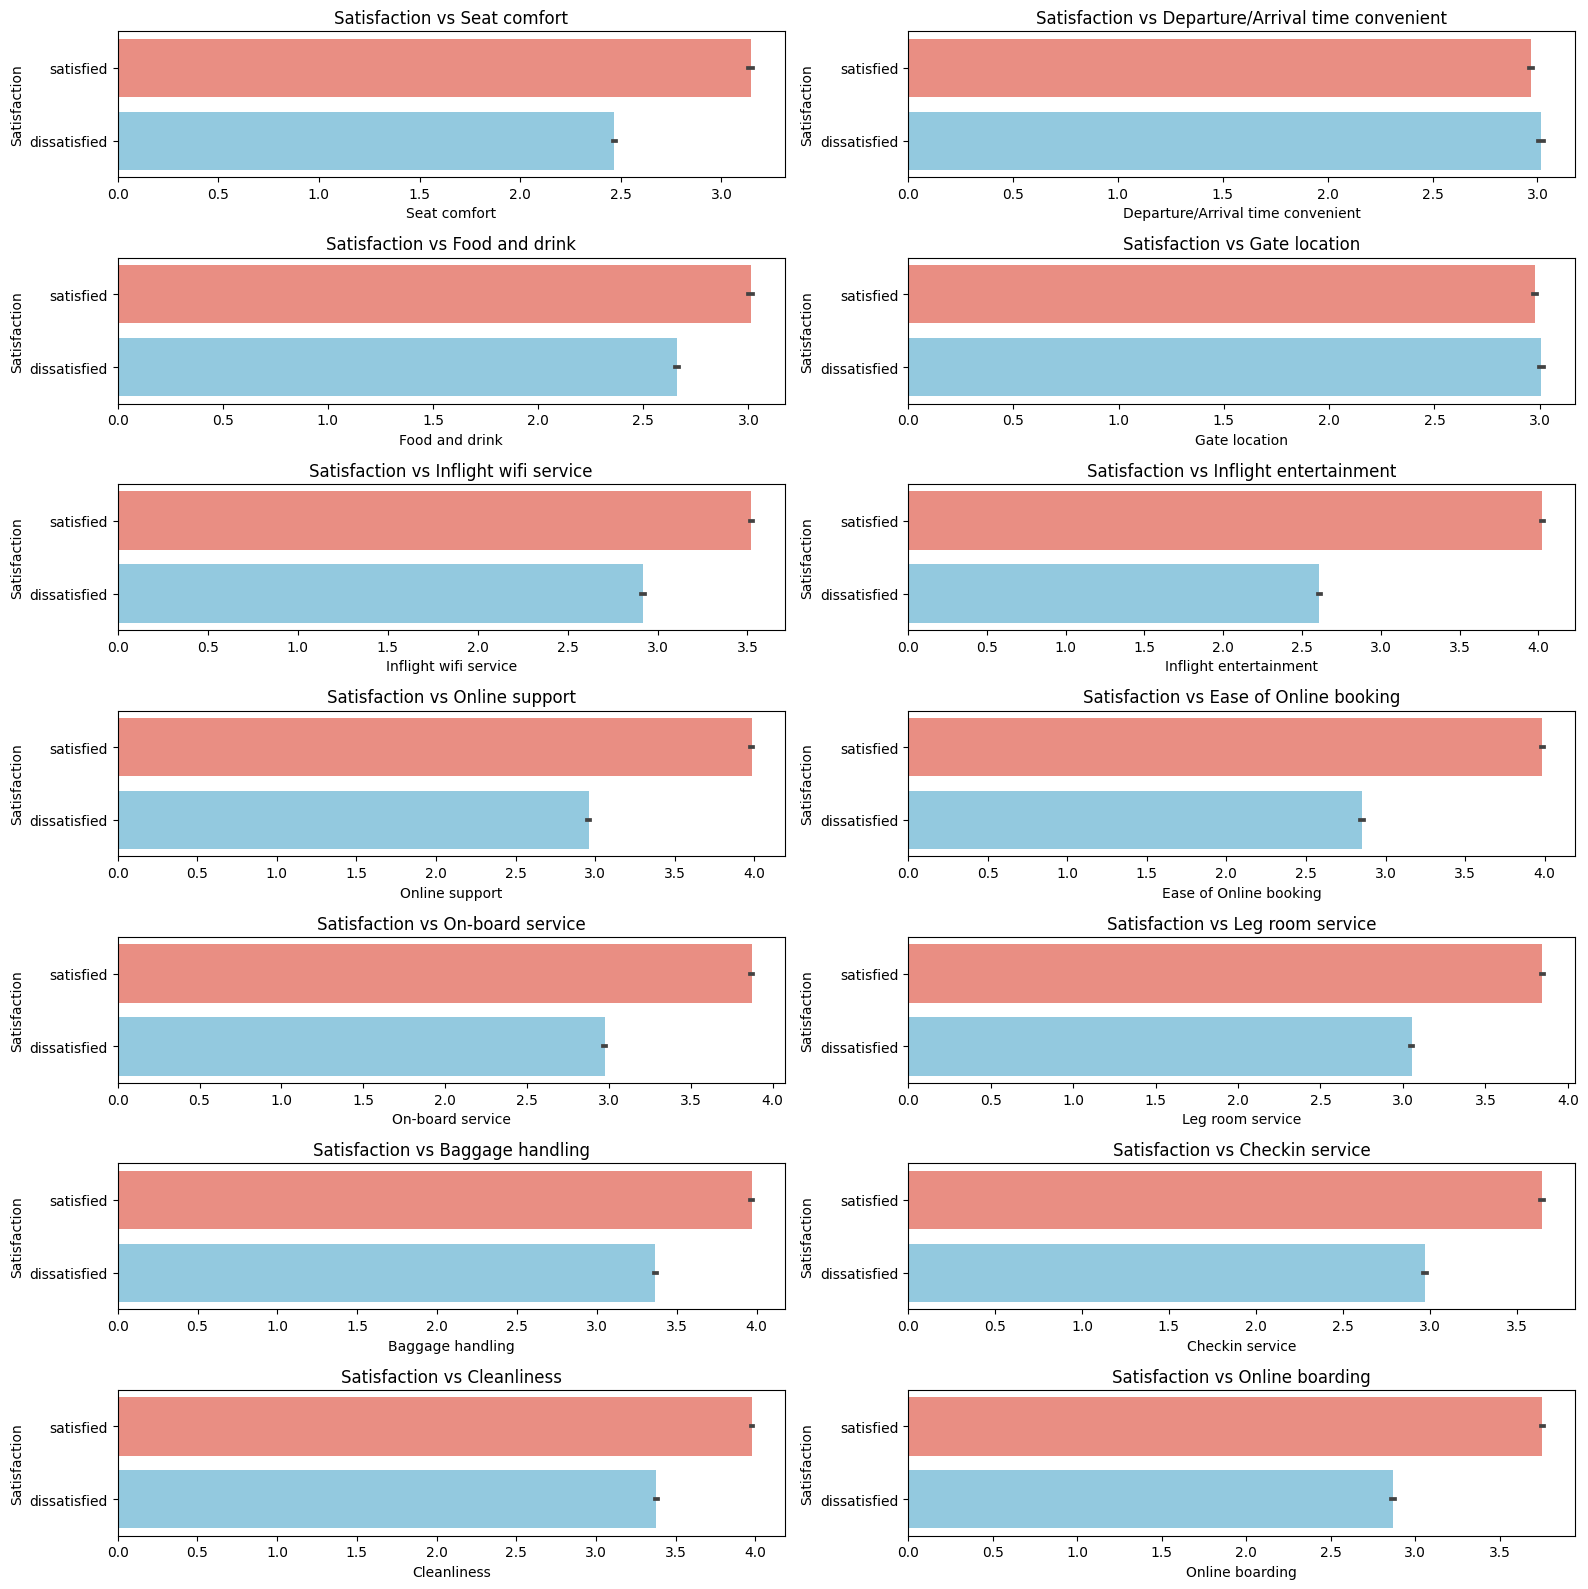

In [14]:
# Set up subplots with 7 rows and 2 columns
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 16))

# Iterate through the rating features and create bar plots
for i, feature in enumerate(rating_features):
    row, col = divmod(i, 2)
    sns.barplot(x=feature, y='satisfaction', data= airline_data, ax=axes[row, col], palette=['salmon', 'skyblue'])
    
    # Setting titles, x-axis labels, and y-axis labels for each subplot
    axes[row, col].set_title(f'Satisfaction vs {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Satisfaction')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

In these graphs, our objective is to discern whether ratings have a direct impact on customer satisfaction or, in other words, to identify the most influential features affecting customer satisfaction

# Preprocessing

In [27]:
# Drop the 'Arrival Delay in Minutes' column from the dataframe cause it has 
# very high correlation with Departure dely
airline_data.drop('Arrival Delay in Minutes', axis=1, inplace=True)

In [28]:
# Split data into x and y.
X = airline_data.drop("satisfaction", axis=1)
y = airline_data["satisfaction"]

In [29]:
# One hot Endocing .
X = pd.get_dummies(X, columns=['Class'])

# Label Encoding.
label_encoder = LabelEncoder()
for i in ['Gender', 'Customer Type', 'Type of Travel']:
    X[i] = label_encoder.fit_transform(X[i])

In [30]:
# Select the features you want to scale
selected_features = X[["Age", "Flight Distance", "Departure Delay in Minutes"]]

scaler = StandardScaler()
scaler.fit(selected_features)
selected_features_scaled = scaler.transform(selected_features)


X[["Age", "Flight Distance", "Departure Delay in Minutes"]] = selected_features_scaled
X.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,1.691351,1,-1.671103,0,0,0,2,2,...,3,0,3,5,3,2,-0.386481,False,True,False
1,1,0,0.500820,1,0.469852,0,0,0,3,0,...,4,4,4,2,3,2,7.756204,True,False,False
2,0,0,-1.615680,1,0.152458,0,0,0,3,2,...,3,3,4,4,4,2,-0.386481,False,True,False
3,0,0,1.360648,1,-1.322552,0,0,0,3,3,...,1,0,1,4,1,3,-0.386481,False,True,False
4,0,0,2.022054,1,-1.584452,0,0,0,3,4,...,2,0,2,4,2,5,-0.386481,False,True,False


# modeling

In [31]:
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean()}")

LogisticRegression: Mean Accuracy = 0.8357233450504664
DecisionTreeClassifier: Mean Accuracy = 0.9367589355587318
RandomForestClassifier: Mean Accuracy = 0.9551605438057706


after evaluating multiple classifiers we found that random forest is the best so we will use it in our predictions

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.960


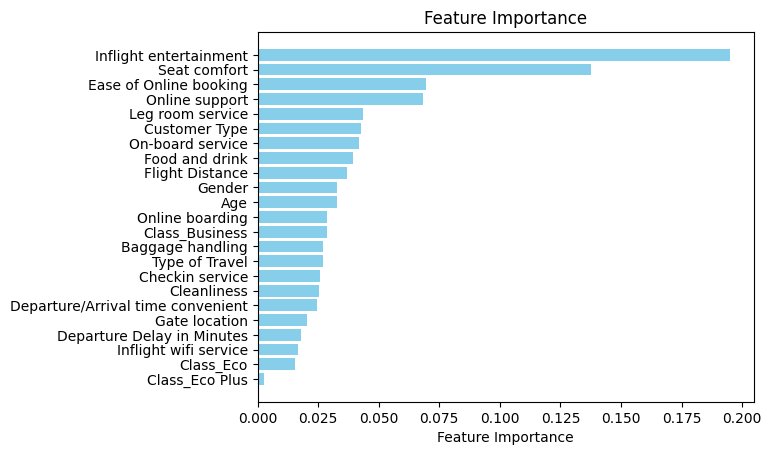

In [35]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
features = X.columns

plt.figure()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

Our analysis implies that there are factors contribute to customer satisfaction in the airline industry. Notably, gender, customer type, and class play a significant role, with women, loyal customers, and those in the business class generally reporting higher satisfaction levels.

Furthermore, rating features such as "Inflight Entertainment" and "Seat Comfort" have as crucial impact of overall satisfaction. The "Inflight Entertainment" feature, in particular, has shown great influence.

Importantly, we discovered that age also influences satisfaction, with older passengers typically expressing higher satisfaction levels.